x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 26s 529us/step - loss: 1.7588 - acc: 0.3597 - val_loss: 1.4586 - val_acc: 0.4727
Epoch 2/50
50000/50000 [==============================] - 24s 487us/step - loss: 1.4317 - acc: 0.4827 - val_loss: 1.2919 - val_acc: 0.5384
Epoch 3/50
50000/50000 [==============================] - 24s 471us/step - loss: 1.2869 - acc: 0.5400 - val_loss: 1.2067 - val_acc: 0.5764
Epoch 4/50
50000/50000 [==============================] - 25s 498us/step - loss: 1.1865 - acc: 0.5811 - val_loss: 1.1226 - val_acc: 0.6040
Epoch 5/50
50000/50000 [==============================] - 23s 463us/step - loss: 1.1090 - acc: 0.6089 - val_loss: 1.0297 - val_acc: 0.6382
Epoch 6/50
50000/50000 [==============================] - 23s 461us/step - loss: 1.0503 - acc: 0.6302 - val_loss: 0.9656 - val_acc: 0.6613
Epoch 7/50
50000/50000 [===================

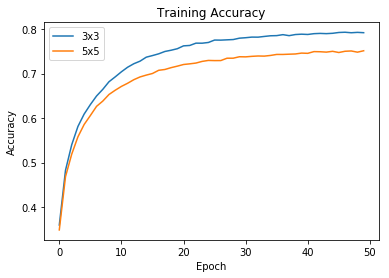

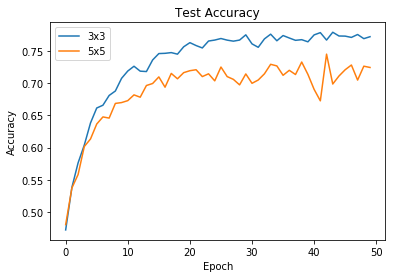

In [4]:
# -*- coding: utf-8 -*-

from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
from google.colab import files
import matplotlib.pyplot as plt

batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


model_3x3 = Sequential()
model_3x3.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model_3x3.add(Activation('relu'))
model_3x3.add(Conv2D(32, (3, 3), padding='same'))
model_3x3.add(Activation('relu'))
model_3x3.add(MaxPooling2D(pool_size=(2, 2)))
model_3x3.add(Dropout(0.25))

model_3x3.add(Conv2D(64, (3, 3), padding='same'))
model_3x3.add(Activation('relu'))
model_3x3.add(Conv2D(64, (3, 3), padding='same'))
model_3x3.add(Activation('relu'))
model_3x3.add(MaxPooling2D(pool_size=(2, 2)))
model_3x3.add(Dropout(0.25))

model_3x3.add(Flatten())
model_3x3.add(Dense(512))
model_3x3.add(Activation('relu'))
model_3x3.add(Dropout(0.5))
model_3x3.add(Dense(num_classes))
model_3x3.add(Activation('softmax'))

model_5x5 = Sequential()
model_5x5.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
model_5x5.add(Activation('relu'))
model_5x5.add(MaxPooling2D(pool_size=(2, 2)))
model_5x5.add(Dropout(0.25))

model_5x5.add(Conv2D(64, (5, 5), padding='same'))
model_5x5.add(Activation('relu'))
model_5x5.add(MaxPooling2D(pool_size=(2, 2)))
model_5x5.add(Dropout(0.25))

model_5x5.add(Flatten())
model_5x5.add(Dense(512))
model_5x5.add(Activation('relu'))
model_5x5.add(Dropout(0.5))
model_5x5.add(Dense(num_classes))
model_5x5.add(Activation('softmax'))

        
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model_3x3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
model_5x5.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

history_model_3x3 = 0
history_model_5x5 = 0

if not data_augmentation:
    history_model_3x3 = model_3x3.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True)
    history_model_5x5 = model_5x5.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

    
    
else:
#     This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    historyDropData = model_3x3.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

    historyNoDropData= model_Adam.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch=1563,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

f1 = plt.figure()
ax1 = f1.add_subplot(111)
ax1.set_title('Training Accuracy')
ax1.plot(history_model_3x3.history['acc']) 
ax1.plot(history_model_5x5.history['acc']) 
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Epoch')
ax1.legend(['3x3', '5x5'], loc='upper left')
f1.savefig("q1e_train.png")
#files.download('q1e_train.png')

f2 = plt.figure()
ax2 = f2.add_subplot(111)
ax2.set_title('Test Accuracy')
ax2.plot(history_model_3x3.history['val_acc']) 
ax2.plot(history_model_5x5.history['val_acc']) 
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Epoch')
ax2.legend(['3x3', '5x5'], loc='upper left')
f2.savefig("q1e_test.png")

#files.download('q1e_test.png')

# Save model and weights
# if not os.path.isdir(save_dir):
#     os.makedirs(save_dir)
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

# # Score trained model.
# scores = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])